<a href="https://colab.research.google.com/github/veranery/AnalisededadosImoveis/blob/main/desafio_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install basedosdados

In [ ]:
import pandas as pd
import geopandas as gpd
import basedosdados as bd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import basedosdados as bd

# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_inep_saeb',
table_id='brasil',
billing_project_id="analise-de-dados-educacionais")
dados = df

Downloading: 100%|██████████| 1124/1124 [00:00<00:00, 3921.01rows/s]


In [ ]:
dados

,ano,rede,localizacao,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,LP,2,751.222766,4.602618,3.951387,5.985628,11.485410,17.949120,22.248559,18.728565,10.458310,4.590403,NaN,NaN
1,2019,federal,total,LP,2,777.844695,1.193606,0.402326,1.581318,3.762806,12.182706,25.344901,28.774909,15.366830,11.390597,NaN,NaN
2,2019,municipal,total,LP,2,741.635071,5.876650,5.299290,8.367580,13.820993,19.199500,20.724740,15.950030,7.151382,3.609836,NaN,NaN
3,2019,privada,total,LP,2,775.639175,0.636825,0.968077,1.990333,6.087452,13.279804,23.714790,25.898868,17.564209,9.859642,NaN,NaN
4,2019,total - estadual e municipal,total,LP,2,743.254884,5.661406,5.071565,7.965156,13.426403,18.988252,20.982185,16.419455,7.710078,3.775500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,2021,Total - Estadual e Municipal,Urbana,LP,2,716.420000,16.490000,11.080000,12.060000,14.560000,14.090000,13.220000,11.190000,5.710000,1.600000,NaN,NaN
1120,2021,Total - Estadual e Municipal,Rural,LP,2,708.370000,24.080000,8.890000,11.090000,11.530000,15.320000,13.600000,9.150000,4.990000,1.340000,NaN,NaN
1121,2021,"Total - Federal, Estadual e Municipal",Total,LP,2,715.640000,17.250000,10.850000,11.960000,14.250000,14.220000,13.260000,10.990000,5.640000,1.580000,NaN,NaN
1122,2021,"Total - Federal, Estadual e Municipal",Urbana,LP,2,716.460000,16.480000,11.070000,12.060000,14.550000,14.090000,13.220000,11.200000,5.720000,1.610000,NaN,NaN


In [ ]:
dados.isnull() # tratando valores nulos

,ano,rede,localizacao,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1120,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1121,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1122,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True


In [ ]:
dados.isnull().sum()

ano              0
rede             0
localizacao      0
disciplina       0
serie            0
media          437
nivel_0        430
nivel_1        430
nivel_2        430
nivel_3        430
nivel_4        430
nivel_5        430
nivel_6        430
nivel_7        430
nivel_8        430
nivel_9        711
nivel_10       897
dtype: int64

In [ ]:
dados = dados.fillna(0)
dados


,ano,rede,localizacao,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,LP,2,751.222766,4.602618,3.951387,5.985628,11.485410,17.949120,22.248559,18.728565,10.458310,4.590403,0.0,0.0
1,2019,federal,total,LP,2,777.844695,1.193606,0.402326,1.581318,3.762806,12.182706,25.344901,28.774909,15.366830,11.390597,0.0,0.0
2,2019,municipal,total,LP,2,741.635071,5.876650,5.299290,8.367580,13.820993,19.199500,20.724740,15.950030,7.151382,3.609836,0.0,0.0
3,2019,privada,total,LP,2,775.639175,0.636825,0.968077,1.990333,6.087452,13.279804,23.714790,25.898868,17.564209,9.859642,0.0,0.0
4,2019,total - estadual e municipal,total,LP,2,743.254884,5.661406,5.071565,7.965156,13.426403,18.988252,20.982185,16.419455,7.710078,3.775500,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,2021,Total - Estadual e Municipal,Urbana,LP,2,716.420000,16.490000,11.080000,12.060000,14.560000,14.090000,13.220000,11.190000,5.710000,1.600000,0.0,0.0
1120,2021,Total - Estadual e Municipal,Rural,LP,2,708.370000,24.080000,8.890000,11.090000,11.530000,15.320000,13.600000,9.150000,4.990000,1.340000,0.0,0.0
1121,2021,"Total - Federal, Estadual e Municipal",Total,LP,2,715.640000,17.250000,10.850000,11.960000,14.250000,14.220000,13.260000,10.990000,5.640000,1.580000,0.0,0.0
1122,2021,"Total - Federal, Estadual e Municipal",Urbana,LP,2,716.460000,16.480000,11.070000,12.060000,14.550000,14.090000,13.220000,11.200000,5.720000,1.610000,0.0,0.0


In [ ]:
dados_ao_longo_tempo = dados[['ano', 'media']]


In [ ]:
#Retirando da base de dados os valores totais de cada ano, deixando os valores unicos
dados.rede.unique()

array(['estadual', 'federal', 'municipal', 'privada',
       'total - estadual e municipal',
       'total - federal, estadual e municipal',
       'total - federal, estadual, municipal e privada',
       'Total - Federal, Estadual, Municipal e Privada', 'Federal',
       'Estadual', 'Municipal', 'Privada', 'Total - Estadual e Municipal',
       'Total - Federal, Estadual e Municipal'], dtype=object)

In [ ]:
dados.localizacao.unique()

array(['total', 'Urbana', 'Rural', 'Total'], dtype=object)

In [ ]:
dados_rede = ['total - estadual e municipal',
       'total - federal, estadual e municipal',
       'total - federal, estadual, municipal e privada',
       'Total - Federal, Estadual, Municipal e Privada', 'Federal', 'Total - Estadual e Municipal',
       'Total - Federal, Estadual e Municipal']
dados_localizacao = ['Urbana', 'Rural']


In [ ]:
resultado_filtrado_redes = dados[~dados['rede'].isin(dados_rede)]


In [ ]:
resultado_filtrado_redes = resultado_filtrado_redes.loc[~resultado_filtrado_redes['localizacao'].isin(dados_localizacao)]
resultado_filtrado_redes

,ano,rede,localizacao,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,LP,2,751.222766,4.602618,3.951387,5.985628,11.485410,17.949120,22.248559,18.728565,10.458310,4.590403,0.0,0.0
1,2019,federal,total,LP,2,777.844695,1.193606,0.402326,1.581318,3.762806,12.182706,25.344901,28.774909,15.366830,11.390597,0.0,0.0
2,2019,municipal,total,LP,2,741.635071,5.876650,5.299290,8.367580,13.820993,19.199500,20.724740,15.950030,7.151382,3.609836,0.0,0.0
3,2019,privada,total,LP,2,775.639175,0.636825,0.968077,1.990333,6.087452,13.279804,23.714790,25.898868,17.564209,9.859642,0.0,0.0
7,2019,estadual,total,MT,2,753.551323,2.353872,3.727819,7.721613,13.576381,19.691037,18.773344,15.290268,11.379596,7.486069,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2021,Municipal,Total,MT,2,733.900000,5.320000,9.250000,12.290000,16.240000,17.940000,17.100000,11.550000,6.840000,3.480000,0.0,0.0
1095,2021,Privada,Total,MT,2,771.700000,1.400000,0.940000,2.920000,7.500000,18.330000,22.620000,18.510000,15.070000,12.690000,0.0,0.0
1109,2021,Estadual,Total,LP,2,725.080000,12.670000,9.970000,12.270000,12.900000,13.470000,15.320000,14.300000,6.890000,2.210000,0.0,0.0
1112,2021,Municipal,Total,LP,2,713.900000,18.090000,11.020000,11.910000,14.500000,14.350000,12.880000,10.380000,5.410000,1.460000,0.0,0.0


In [ ]:
ordem_maior_media = resultado_filtrado_redes.sort_values(by='media', ascending=False) #ordenando as media em ordem crescente
ordem_maior_media

,ano,rede,localizacao,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
1,2019,federal,total,LP,2,777.844695,1.193606,0.402326,1.581318,3.762806,12.182706,25.344901,28.774909,15.366830,11.390597,0.0,0.0
8,2019,federal,total,MT,2,777.500857,0.777419,1.204929,2.164175,7.794489,14.556051,18.520092,21.635998,18.328005,15.018843,0.0,0.0
3,2019,privada,total,LP,2,775.639175,0.636825,0.968077,1.990333,6.087452,13.279804,23.714790,25.898868,17.564209,9.859642,0.0,0.0
10,2019,privada,total,MT,2,772.876183,0.365042,1.294554,3.590991,9.331127,16.194810,19.704380,19.885563,17.342228,12.291304,0.0,0.0
1115,2021,Privada,Total,LP,2,772.400000,1.150000,1.380000,2.100000,7.750000,13.730000,24.090000,24.500000,15.570000,9.710000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,2003,privada,total,MT,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
655,2005,estadual,total,MT,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
656,2005,federal,total,MT,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
657,2005,municipal,total,MT,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


###Desafio - Embarque em uma máquina do tempo e descubra como o desempenho dos estudantes mudou ao longo dos anos. Estamos melhorando ou regredindo?

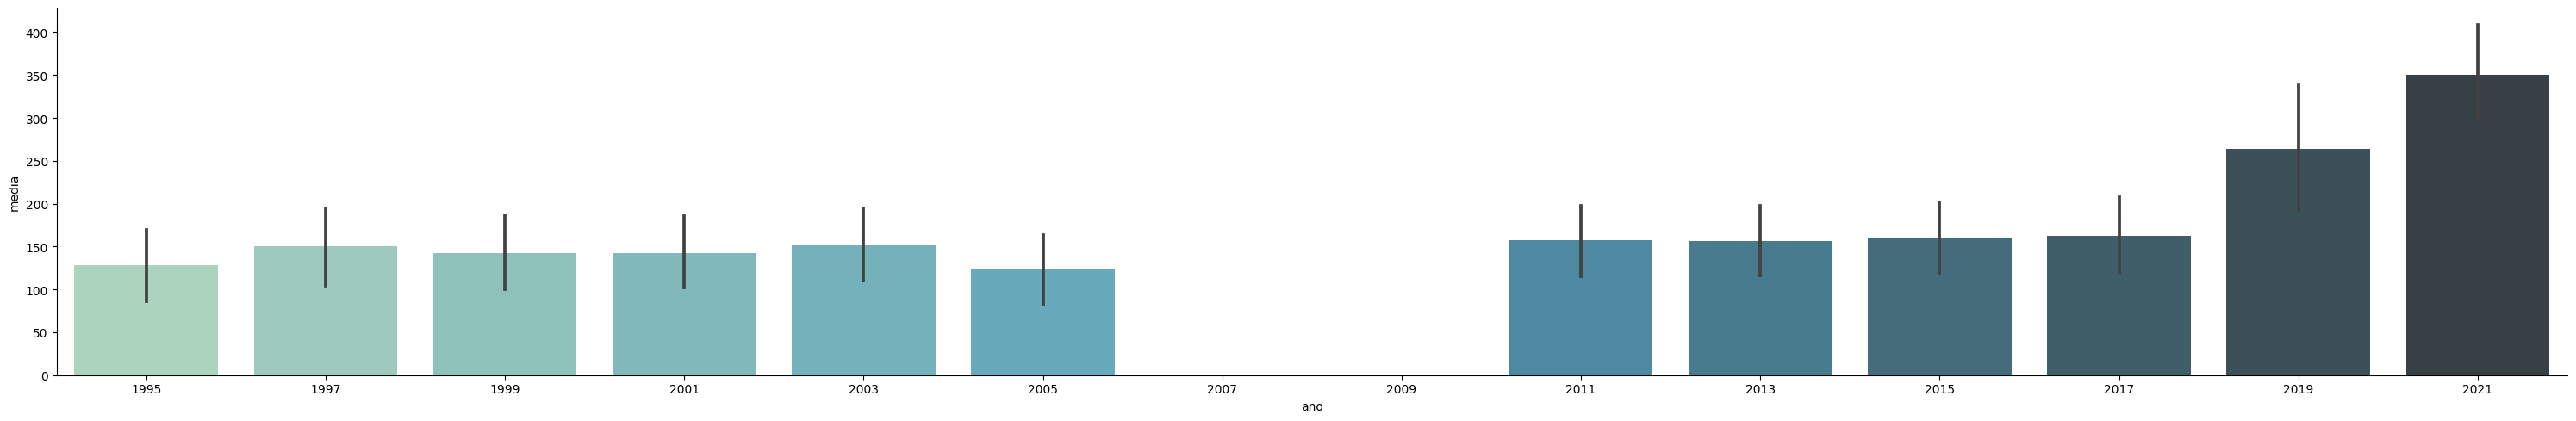

In [ ]:
#dados_ao_longo_tempo.plot(kind='barh', figsize=(50, 25), color='purple')
sns.catplot(x = 'ano', y = "media", kind= "bar", data = ordem_maior_media, aspect = 6,
    palette = "GnBu_d")

###Ao analisar o gráfico, percebemos uma relativa estabilidade ao longo dos anos, com uma ressalva para os anos de 2019 e 2021. Nestes dois últimos anos, notamos um incremento na média tanto para as redes privadas quanto públicas. Contudo, é prudente destacar que a disponibilidade de dados pode não ser suficiente para sustentar a alegação de uma mudança substancial e significativa.Essas variações podem ser atribuídas à transição para provas online e à obrigatoriedade do teste para todas as escolas a partir de 2021.Outro ponto a ser levado em consideração é a proposta de calcular a média ao longo de três anos, substituindo o Enem em 2024, sugere uma estratégia avaliativa mais abrangente.

###Desafio - Qual disciplina reina suprema? Quem tem os melhores magos da matemática e os mestres da língua ou outros poderes?


In [ ]:
#juntando disciplina e média
#fazer um grafico de cada estado com as notas da disciplinas para verificar se houve melhora individual
dados_disci_nota = dados[['disciplina', 'media']]
ordem_maior_media_disciplina = dados_disci_nota.sort_values(by='media', ascending=False) #ordenando as media em ordem crescente


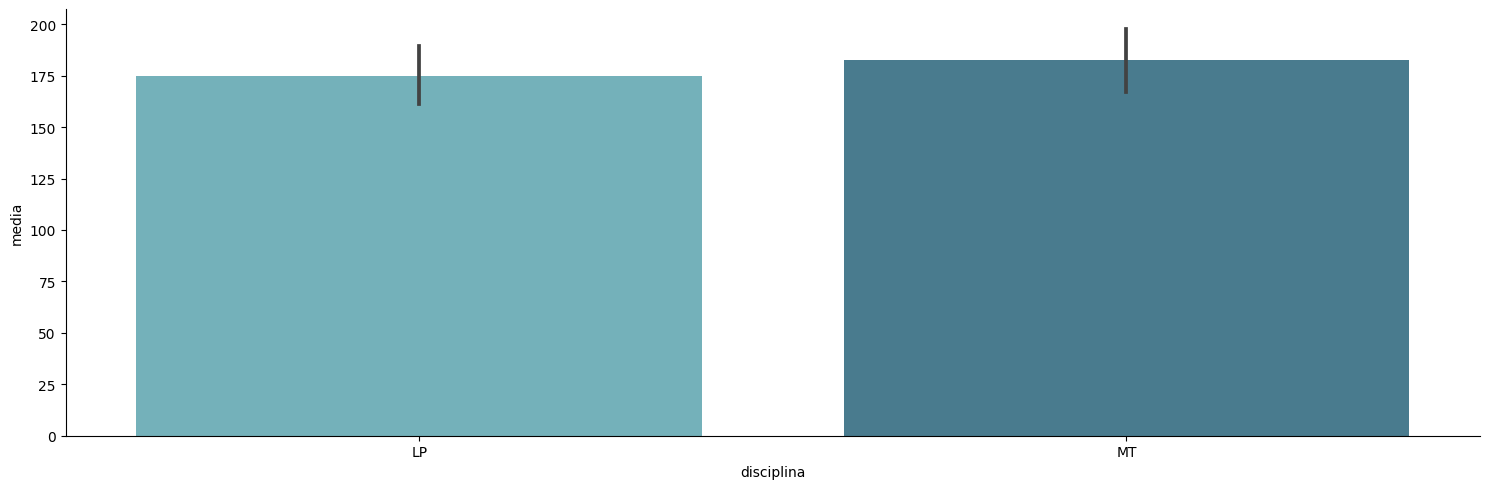

In [ ]:
#visualizando a media das notas em LP e MT
sns.catplot(x = 'disciplina', y = "media", kind= "bar", data = ordem_maior_media_disciplina, aspect = 3,
    palette = "GnBu_d")

In [ ]:
#separando as notas de MT e fazendo a média
dados_disci_MT = dados_disci_nota.query("disciplina == 'MT'")

dados_disci_media_MT = dados_disci_MT.mean()
dados_disci_media_MT

media    182.618511
dtype: float64

In [ ]:
#Resultado da mediana
dados_disci_mediana_MT = dados_disci_MT.median()
dados_disci_mediana_MT

media    222.355995
dtype: float64

In [ ]:
#separando as notas de LP e fazendo a média

dados_disci_LP = dados_disci_nota.query("disciplina == 'LP'")
dados_disci_media_LP = dados_disci_LP.mean()
dados_disci_media_LP

media    174.742075
dtype: float64

In [ ]:
#Resultado mediana
dados_disci_mediana_LP = dados_disci_LP.median()
dados_disci_mediana_LP

media    209.05206
dtype: float64

Nos dois casos, a média (174,74) é menor que a mediana (209,05). Isso indica que a distribuição dos dados é assimétrica, com uma cauda mais longa à esquerda. Isso significa que há mais valores baixos do que altos. A melhor explicação é que haja outliers (valores extremos) na cauda esquerda da distribuição. Esses outliers podem estar distorcendo a média, fazendo com que ela pareça menor do que a mediana.



In [ ]:
dados_disci_LP = dados.query("disciplina == 'LP'")
notas_LP = dados_disci_LP['media']

In [ ]:
dados_disci_MT = dados.query("disciplina == 'MT'")
notas_matematica = dados_disci_MT['media']


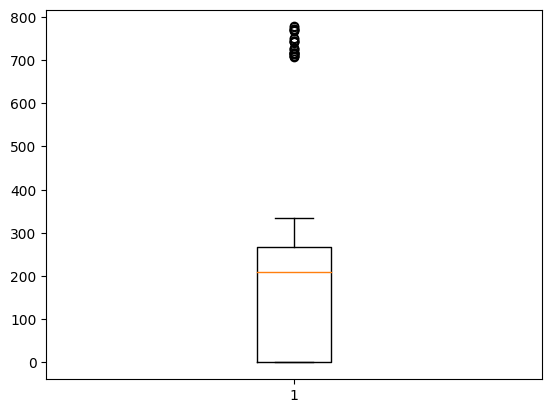

In [ ]:
# Fazendo um boxplot para entender melhor a distribuiçao dos dados. E com o boxplot podemos confimar a existencia de outliers.
import matplotlib.pyplot as plt

plt.boxplot(notas_LP)
plt.show()


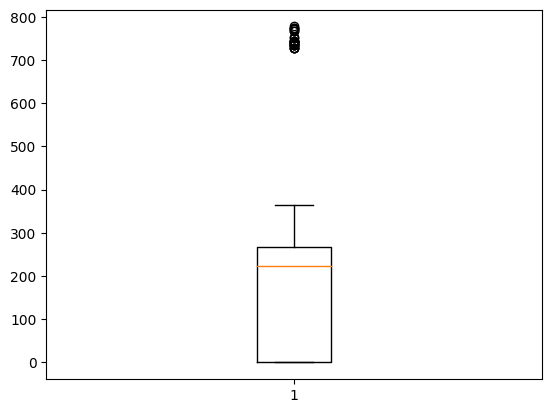

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(notas_matematica)
plt.show()


In [ ]:
#teste de shapiro para verificar se os dados são paramétricos
import scipy.stats as stats

w_matematica, p_matematica = stats.shapiro(notas_matematica)
w_portugues, p_portugues = stats.shapiro(notas_LP)

print(w_matematica, p_matematica)
print(w_portugues, p_portugues)


0.7910552620887756 3.1120799985538064e-26
0.7841070890426636 1.339611387697652e-26


Os valores de w para ambas as notas de matemática e português (0.791 e 0.784) estão abaixo de 0.9, o que geralmente indica que os dados não seguem uma distribuição normal.
Os valores de p para ambas as notas são extremamente pequenos (3.112e-26 e 1.339e-26), reforçando a conclusão de que a hipótese nula de normalidade é rejeitada.
Por essa razao, o teste Mann-Whitney sera feito.

In [ ]:
#teste mannwhitney p
import scipy.stats as stats

mt, lp = stats.mannwhitneyu(notas_matematica, notas_LP)

print(mt, lp)


163614.0 0.28099190844876887


A análise de distribuição dos dados mostrou que as notas de matemática e português não seguem uma distribuição normal. O teste de Mann-Whitney também não detectou diferença significativa entre as notas das duas matérias. Portanto, não é possível afirmar que uma matéria é superior à outra.

Outra observação importante é a presença de outliers nos dados. Esses valores extremos podem indicar discrepâncias no ensino brasileiro, como, por exemplo, a existência de alunos com notas muito altas ou muito baixas em comparação com a média.

### Atividade Extra: Qual a diferença entre as notas de escolas públicas e privadas

###Desafio - Viaje pelo Brasil e descubra quais estados contêm os tesouros do alto desempenho e quais enfrentam os desafios do baixo rendimento.

In [ ]:
df = bd.read_table(dataset_id='br_inep_saeb',
table_id='uf',
billing_project_id="analise-de-dados-educacionais")
dados_uf = df

Downloading: 100%|██████████| 31790/31790 [00:06<00:00, 4758.20rows/s]


In [ ]:
dados_rede_uf = ['total - estadual e municipal',
       'total - federal, estadual e municipal',
       'total - federal, estadual, municipal e privada',
       'Total - Federal, Estadual, Municipal e Privada', 'Federal', 'Total - Estadual e Municipal',
       'Total - Federal, Estadual e Municipal']
dados_localizacao = ['Urbana', 'Rural']


In [ ]:
#retirando os totais da rede para nao duplicar os dados
resultado_filtrado_uf = dados_uf[~dados_uf['rede'].isin(dados_rede)]
resultado_filtrado_uf = resultado_filtrado_uf.loc[~resultado_filtrado_uf['localizacao'].isin(dados_localizacao)]
resultado_filtrado_uf

,ano,rede,localizacao,sigla_uf,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,AC,LP,2,747.760467,3.790086,3.561181,5.804402,13.526525,22.718090,21.779175,18.067362,6.290844,4.462335,NaN,NaN
1,2019,federal,total,AC,LP,2,777.825373,0.000000,0.000000,4.761905,0.000000,9.523810,28.571429,42.857143,9.523810,4.761905,NaN,NaN
2,2019,municipal,total,AC,LP,2,738.481064,4.812075,4.938118,7.416916,16.427986,22.910232,22.457441,14.914972,4.674572,1.447689,NaN,NaN
3,2019,privada,total,AC,LP,2,779.609795,1.112791,0.964419,1.520814,3.746395,12.600819,23.719963,25.087001,16.977795,14.270004,NaN,NaN
7,2019,estadual,total,AL,LP,2,718.882757,9.874490,7.644338,15.184035,19.124725,21.892096,14.976919,7.778167,3.195372,0.329857,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31757,2021,Municipal,Total,SP,LP,2,722.240000,12.040000,9.920000,11.410000,19.080000,11.990000,15.330000,12.990000,6.640000,0.580000,NaN,NaN
31760,2021,Privada,Total,SP,LP,2,782.820000,2.440000,1.630000,2.180000,6.870000,4.610000,13.970000,31.200000,20.400000,16.700000,NaN,NaN
31775,2021,Estadual,Total,TO,LP,2,740.070000,5.810000,5.810000,6.510000,16.730000,21.130000,19.890000,16.020000,7.390000,0.700000,NaN,NaN
31778,2021,Municipal,Total,TO,LP,2,689.790000,26.550000,14.040000,15.680000,19.360000,15.410000,4.870000,3.530000,0.450000,0.110000,NaN,NaN


In [ ]:
resultado_filtrado_uf = resultado_filtrado_uf.fillna(0)
resultado_filtrado_uf

,ano,rede,localizacao,sigla_uf,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,AC,LP,2,747.760467,3.790086,3.561181,5.804402,13.526525,22.718090,21.779175,18.067362,6.290844,4.462335,0.0,0.0
1,2019,federal,total,AC,LP,2,777.825373,0.000000,0.000000,4.761905,0.000000,9.523810,28.571429,42.857143,9.523810,4.761905,0.0,0.0
2,2019,municipal,total,AC,LP,2,738.481064,4.812075,4.938118,7.416916,16.427986,22.910232,22.457441,14.914972,4.674572,1.447689,0.0,0.0
3,2019,privada,total,AC,LP,2,779.609795,1.112791,0.964419,1.520814,3.746395,12.600819,23.719963,25.087001,16.977795,14.270004,0.0,0.0
7,2019,estadual,total,AL,LP,2,718.882757,9.874490,7.644338,15.184035,19.124725,21.892096,14.976919,7.778167,3.195372,0.329857,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31757,2021,Municipal,Total,SP,LP,2,722.240000,12.040000,9.920000,11.410000,19.080000,11.990000,15.330000,12.990000,6.640000,0.580000,0.0,0.0
31760,2021,Privada,Total,SP,LP,2,782.820000,2.440000,1.630000,2.180000,6.870000,4.610000,13.970000,31.200000,20.400000,16.700000,0.0,0.0
31775,2021,Estadual,Total,TO,LP,2,740.070000,5.810000,5.810000,6.510000,16.730000,21.130000,19.890000,16.020000,7.390000,0.700000,0.0,0.0
31778,2021,Municipal,Total,TO,LP,2,689.790000,26.550000,14.040000,15.680000,19.360000,15.410000,4.870000,3.530000,0.450000,0.110000,0.0,0.0


In [ ]:
resultado_filtrado_uf[['sigla_uf', 'media']]

,sigla_uf,media
0,AC,747.760467
1,AC,777.825373
2,AC,738.481064
3,AC,779.609795
7,AL,718.882757
...,...,...
31757,SP,722.240000
31760,SP,782.820000
31775,TO,740.070000
31778,TO,689.790000


In [ ]:
ordem_media_uf = resultado_filtrado_uf.sort_values(by='media', ascending=False)#ordenando as media em ordem crescente
ordem_media_uf.head(10)

,ano,rede,localizacao,sigla_uf,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
659,2021,federal,total,PB,MT,2,793.920000,0.000000,4.920000,0.000000,0.000000,0.000000,24.000000,19.690000,26.770000,24.620000,0.0,0.0
31173,2021,Privada,Total,SC,MT,2,792.770000,0.000000,0.000000,0.010000,5.230000,8.000000,22.810000,13.760000,32.060000,18.120000,0.0,0.0
537,2019,privada,total,SC,MT,2,792.708899,0.000000,0.453171,1.044748,3.591444,9.791254,17.727023,19.519662,26.830511,21.042187,0.0,0.0
724,2021,privada,total,SC,MT,2,792.210000,0.000000,0.000000,0.010000,5.230000,8.180000,23.350000,13.760000,32.070000,17.400000,0.0,0.0
31719,2021,Privada,Total,SC,LP,2,790.520000,0.000000,0.000000,0.540000,2.540000,11.090000,14.510000,29.870000,33.230000,8.210000,0.0,0.0
350,2021,privada,total,SC,LP,2,790.010000,0.000000,0.000000,0.540000,2.730000,11.190000,14.700000,30.140000,33.320000,7.370000,0.0,0.0
163,2019,privada,total,SC,LP,2,789.315947,0.444627,0.363218,0.474844,2.471062,6.546656,21.166074,30.564525,22.676798,15.292196,0.0,0.0
500,2019,federal,total,RJ,MT,2,789.041917,0.288157,0.584953,0.582503,4.800886,11.115058,17.542945,21.709994,23.001268,20.374237,0.0,0.0
31214,2021,Privada,Total,SP,MT,2,787.020000,2.800000,0.280000,2.300000,4.550000,8.930000,19.750000,20.140000,15.620000,25.640000,0.0,0.0
738,2021,privada,total,SP,MT,2,786.920000,2.800000,0.270000,2.290000,4.710000,9.100000,19.910000,19.700000,15.310000,25.900000,0.0,0.0


Text(0.5, 1.0, 'Gráfico Das Maiores Notas por Estados')

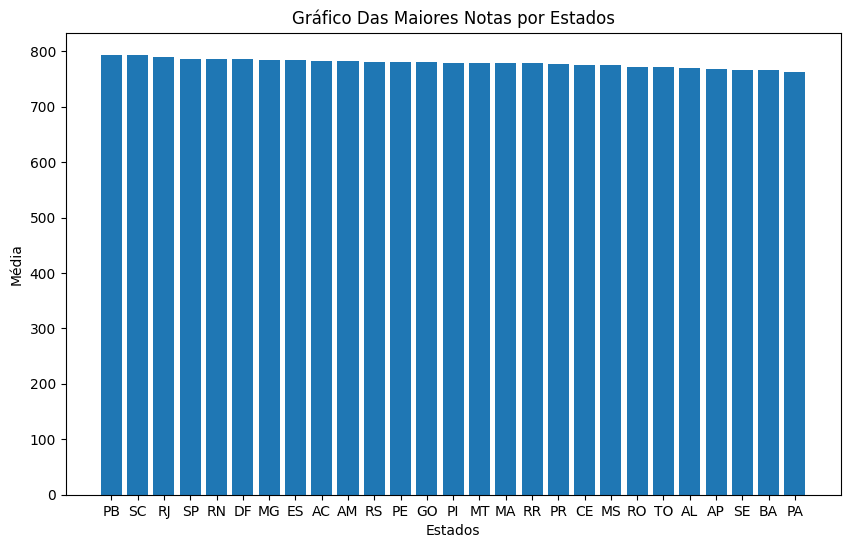

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(ordem_media_uf['sigla_uf'], ordem_media_uf['media'])

# Adicionar rótulos e título
plt.xlabel('Estados')
plt.ylabel('Média')
plt.title('Gráfico Das Maiores Notas por Estados')

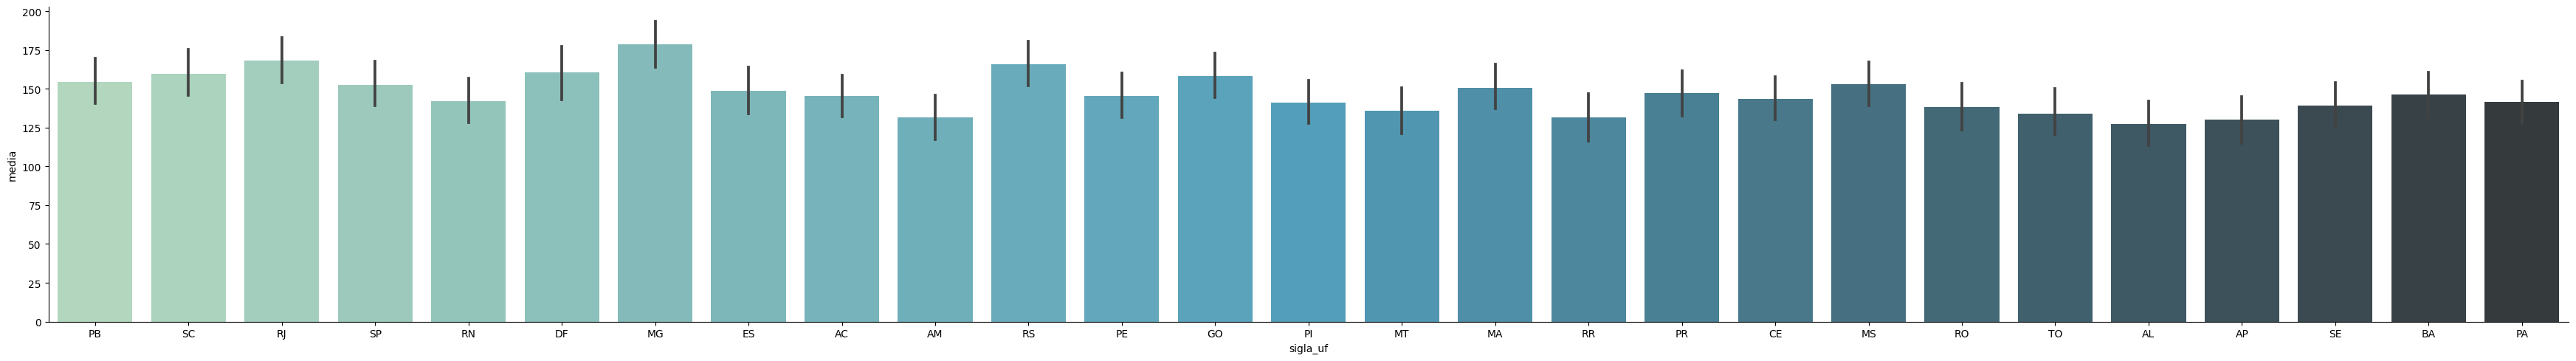

In [ ]:
#gráfico das medias por estado (juntando as duas disciplinas)
sns.catplot(x = 'sigla_uf', y = "media", kind= "bar", data = ordem_media_uf, aspect = 7,
    palette = "GnBu_d")

In [ ]:

resultado_filtrado_LP = resultado_filtrado_uf.loc[(resultado_filtrado_uf['disciplina'] == 'LP')]
resultado_filtrado_LP


,ano,rede,localizacao,sigla_uf,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
0,2019,estadual,total,AC,LP,2,747.760467,3.790086,3.561181,5.804402,13.526525,22.718090,21.779175,18.067362,6.290844,4.462335,0.0,0.0
1,2019,federal,total,AC,LP,2,777.825373,0.000000,0.000000,4.761905,0.000000,9.523810,28.571429,42.857143,9.523810,4.761905,0.0,0.0
2,2019,municipal,total,AC,LP,2,738.481064,4.812075,4.938118,7.416916,16.427986,22.910232,22.457441,14.914972,4.674572,1.447689,0.0,0.0
3,2019,privada,total,AC,LP,2,779.609795,1.112791,0.964419,1.520814,3.746395,12.600819,23.719963,25.087001,16.977795,14.270004,0.0,0.0
7,2019,estadual,total,AL,LP,2,718.882757,9.874490,7.644338,15.184035,19.124725,21.892096,14.976919,7.778167,3.195372,0.329857,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31757,2021,Municipal,Total,SP,LP,2,722.240000,12.040000,9.920000,11.410000,19.080000,11.990000,15.330000,12.990000,6.640000,0.580000,0.0,0.0
31760,2021,Privada,Total,SP,LP,2,782.820000,2.440000,1.630000,2.180000,6.870000,4.610000,13.970000,31.200000,20.400000,16.700000,0.0,0.0
31775,2021,Estadual,Total,TO,LP,2,740.070000,5.810000,5.810000,6.510000,16.730000,21.130000,19.890000,16.020000,7.390000,0.700000,0.0,0.0
31778,2021,Municipal,Total,TO,LP,2,689.790000,26.550000,14.040000,15.680000,19.360000,15.410000,4.870000,3.530000,0.450000,0.110000,0.0,0.0


In [ ]:
ordem_media_LP = resultado_filtrado_LP.sort_values(by='media', ascending=False)
ordem_media_LP.head(10)


,ano,rede,localizacao,sigla_uf,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
31719,2021,Privada,Total,SC,LP,2,790.520000,0.000000,0.000000,0.540000,2.540000,11.090000,14.510000,29.870000,33.230000,8.210000,0.0,0.0
350,2021,privada,total,SC,LP,2,790.010000,0.000000,0.000000,0.540000,2.730000,11.190000,14.700000,30.140000,33.320000,7.370000,0.0,0.0
163,2019,privada,total,SC,LP,2,789.315947,0.444627,0.363218,0.474844,2.471062,6.546656,21.166074,30.564525,22.676798,15.292196,0.0,0.0
44,2019,privada,total,DF,LP,2,786.362078,0.361044,0.385113,1.124699,3.020179,8.552066,21.336021,29.531712,23.251212,12.437954,0.0,0.0
126,2019,federal,total,RJ,LP,2,785.408960,0.136155,0.136155,0.509429,1.663267,10.350741,25.290330,29.821369,18.382179,13.710375,0.0,0.0
72,2019,privada,total,MG,LP,2,785.241240,0.178173,0.454903,0.620798,3.795299,9.867925,20.246174,28.763229,20.737011,15.336487,0.0,0.0
51,2019,privada,total,ES,LP,2,783.660781,0.399789,0.541649,0.924243,2.889823,11.072807,20.797330,29.267820,22.440309,11.666232,0.0,0.0
31760,2021,Privada,Total,SP,LP,2,782.820000,2.440000,1.630000,2.180000,6.870000,4.610000,13.970000,31.200000,20.400000,16.700000,0.0,0.0
364,2021,privada,total,SP,LP,2,782.700000,2.370000,1.690000,2.300000,6.990000,4.650000,13.990000,30.870000,20.250000,16.920000,0.0,0.0
128,2019,privada,total,RJ,LP,2,782.092017,0.112880,0.340626,1.259389,5.230302,11.426856,20.768277,28.652091,19.332011,12.877569,0.0,0.0


Text(0.5, 1.0, 'Gráfico Das Maiores Notas dos Estados em LP')

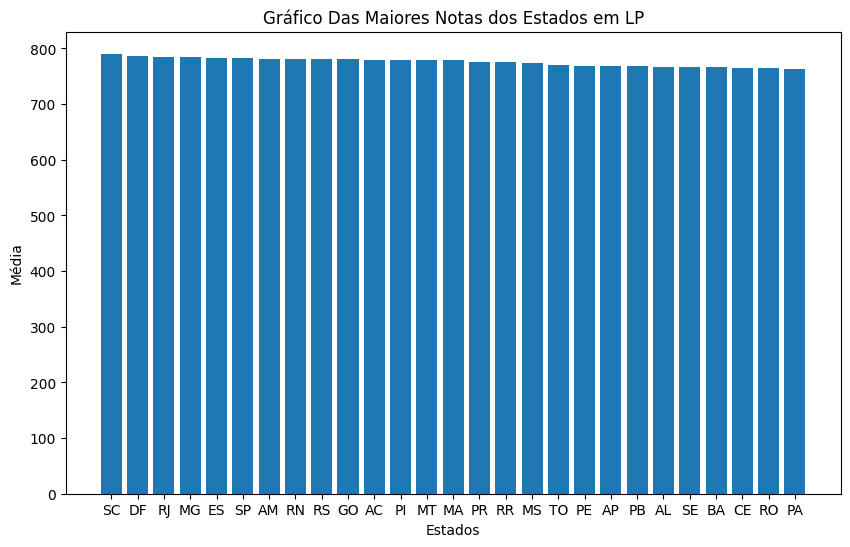

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(ordem_media_LP['sigla_uf'], ordem_media_LP['media'])

# Adicionar rótulos e título
plt.xlabel('Estados')
plt.ylabel('Média')
plt.title('Gráfico Das Maiores Notas dos Estados em LP')

A análise das maiores médias de cada estado revela que as notas são muito próximas entre si. No entanto, Santa Catarina e o Distrito Federal possuem as duas maiores médias, com notas de 790.52 e 790.01 , respectivamente.

In [ ]:
resultado_filtrado_MT = resultado_filtrado_uf.loc[(resultado_filtrado_uf['disciplina'] == 'MT')]
ordem_media_MT = resultado_filtrado_MT.sort_values(by='media', ascending=False)
ordem_media_MT.head(10)

,ano,rede,localizacao,sigla_uf,disciplina,serie,media,nivel_0,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,nivel_7,nivel_8,nivel_9,nivel_10
659,2021,federal,total,PB,MT,2,793.920000,0.000000,4.920000,0.000000,0.000000,0.000000,24.000000,19.690000,26.770000,24.620000,0.0,0.0
31173,2021,Privada,Total,SC,MT,2,792.770000,0.000000,0.000000,0.010000,5.230000,8.000000,22.810000,13.760000,32.060000,18.120000,0.0,0.0
537,2019,privada,total,SC,MT,2,792.708899,0.000000,0.453171,1.044748,3.591444,9.791254,17.727023,19.519662,26.830511,21.042187,0.0,0.0
724,2021,privada,total,SC,MT,2,792.210000,0.000000,0.000000,0.010000,5.230000,8.180000,23.350000,13.760000,32.070000,17.400000,0.0,0.0
500,2019,federal,total,RJ,MT,2,789.041917,0.288157,0.584953,0.582503,4.800886,11.115058,17.542945,21.709994,23.001268,20.374237,0.0,0.0
31214,2021,Privada,Total,SP,MT,2,787.020000,2.800000,0.280000,2.300000,4.550000,8.930000,19.750000,20.140000,15.620000,25.640000,0.0,0.0
738,2021,privada,total,SP,MT,2,786.920000,2.800000,0.270000,2.290000,4.710000,9.100000,19.910000,19.700000,15.310000,25.900000,0.0,0.0
507,2019,federal,total,RN,MT,2,786.554498,0.000000,0.000000,0.000000,2.500000,14.642857,27.023810,24.166667,14.523810,17.142857,0.0,0.0
30824,2021,Privada,Total,DF,MT,2,784.500000,1.150000,0.000000,0.710000,5.510000,11.440000,20.010000,22.980000,24.250000,13.940000,0.0,0.0
606,2021,privada,total,DF,MT,2,783.270000,1.210000,0.000000,0.560000,5.620000,12.750000,19.000000,24.430000,23.760000,12.670000,0.0,0.0


falar que as maiores medias sao de escolas privadas (falta)





Text(0.5, 1.0, 'Gráfico Das Maiores Notas dos Estados em MT')

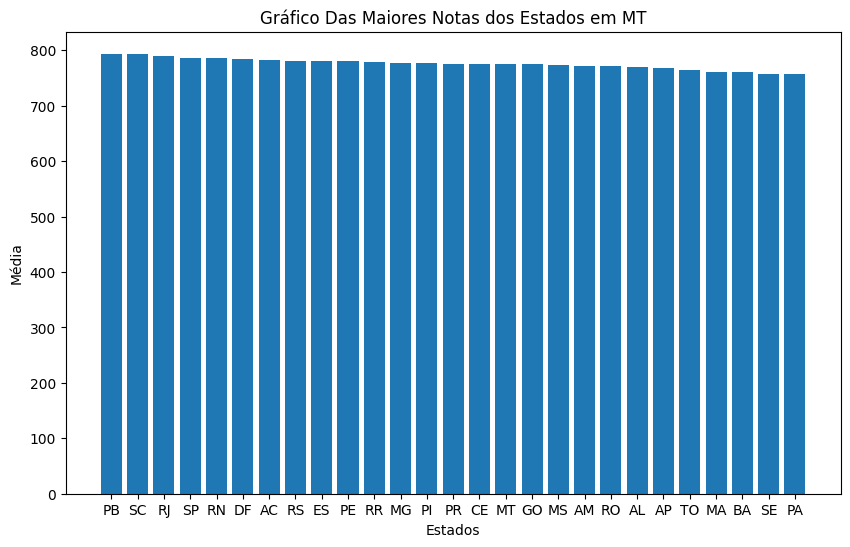

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(ordem_media_MT['sigla_uf'], ordem_media_MT['media'])

# Adicionar rótulos e título
plt.xlabel('Estados')
plt.ylabel('Média')
plt.title('Gráfico Das Maiores Notas dos Estados em MT')

A análise das maiores médias de cada estado revela que as notas são muito próximas entre si. No entanto, Pernambuco (PB) e Santa Catarina (SC) possuem as duas maiores médias, com notas de 793.92 e 792.77, respectivamente.

Text(0.5, 1.0, 'Gráfico Das Médias das notas dos alunos por Estado ')

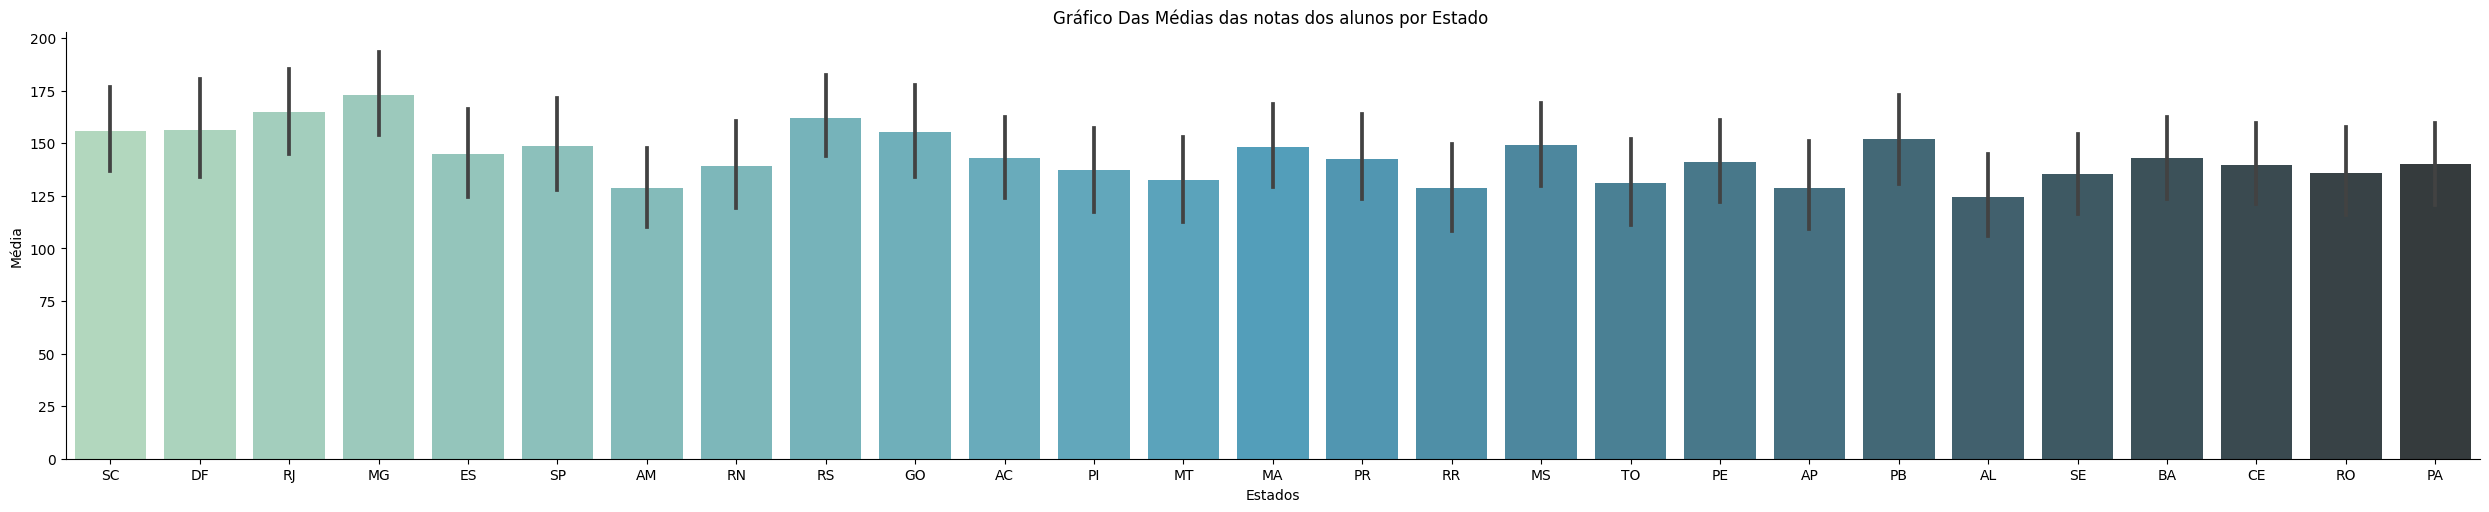

In [ ]:
sns.catplot(x = 'sigla_uf', y = "media", kind= "bar", data= ordem_media_LP, aspect = 5,
    palette = "GnBu_d")
plt.xlabel('Estados')
plt.ylabel('Média')
plt.title('Gráfico Das Médias das notas dos alunos por Estado ')

Text(0.5, 1.0, 'Gráfico Das Médias das notas dos alunos por Estado ')

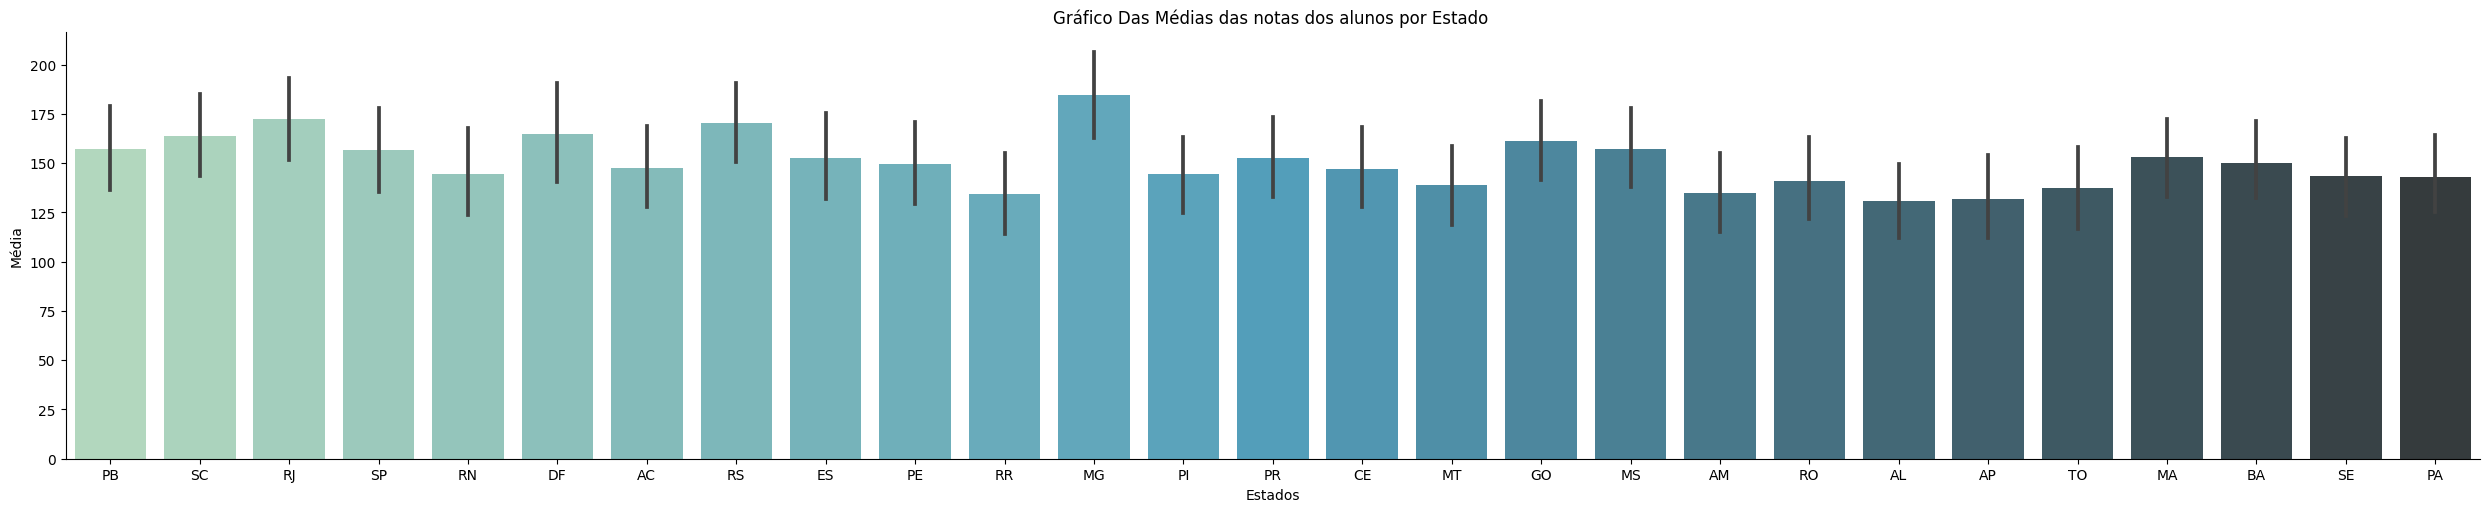

In [ ]:
sns.catplot(x = 'sigla_uf', y = "media", kind= "bar", data= ordem_media_MT, aspect = 5,
    palette = "GnBu_d")
plt.xlabel('Estados')
plt.ylabel('Média')
plt.title('Gráfico Das Médias das notas dos alunos por Estado ')

###Análise de desempenho dos estados brasileiros

Uma análise dos resultados de testes padronizados no Brasil revela que os estados do norte e nordeste, em geral, apresentam notas mais baixas do que os estados do sul, sudeste e centro-oeste. E o Estado de Minas Gerais possui maiores médias em língua portuguesa e matemática.


Uma possível explicação para essa diferença de desempenho é a diferença de investimento em educação entre os estados. O Distrito Federal, por exemplo, investe 10.942,86 por aluno, enquanto o Amazonas investe apenas 3.075,89.

É importante ressaltar que outros fatores também podem contribuir para as diferenças de desempenho entre os estados, como a desigualdade social, a qualidade da infraestrutura escolar e a qualificação dos professores.

O caso do estado do Maranhão:

O estado do Maranhão tem as piores taxas de alfabetização, conclusão do ensino médio e pontuações de testes padronizados do país. Também tem a maior taxa de desemprego, os salários médios mais baixos e as taxas de crescimento econômico mais lentas. Esses dados sugerem que o Maranhão é um dos estados que enfrentam os desafios do baixo rendimento no Brasil.

